In [ ]:
# 1. GENEL
# 2. KATEGORIK DEGISKEN ANALIZI
# 3. SAYISAL DEGISKEN ANALIZI
# 4. TARGET ANALIZI
# 5. SAYISAL DEGISKENLERIN BIRBIRLERINE GORE ANALIZI

In [2]:
# 1. GENEL RESIM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
pd.pandas.set_option('display.max_columns', None)
df = pd.read_csv("grad/cnc.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'grad/cnc.csv'

In [5]:
failure_label = preprocessing.LabelEncoder()
df["failure"] = failure_label.fit_transform(df["failure"])

In [6]:
df.head()

,datetime,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd,error1count,error2count,error3count,error4count,error5count,model,age,failure
0,2015-01-02T05:00:00Z,1,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,model3,18,0
1,2015-01-02T08:00:00Z,1,170.525721,443.906847,97.667249,39.786670,12.591948,46.930282,9.406795,6.098173,0.0,0.0,0.0,0.0,0.0,model3,18,0
2,2015-01-02T11:00:00Z,1,170.049722,446.461279,96.906162,40.016513,13.277336,42.836780,9.071472,5.481724,0.0,0.0,0.0,0.0,0.0,model3,18,0
3,2015-01-02T14:00:00Z,1,170.341974,447.355315,96.229522,39.921963,13.817158,42.808633,8.256794,5.862312,0.0,0.0,0.0,0.0,0.0,model3,18,0
4,2015-01-02T17:00:00Z,1,170.060643,452.163407,96.357441,39.990470,14.792869,42.525293,8.669605,5.907157,0.0,0.0,0.0,0.0,0.0,model3,18,0


In [7]:
df.tail()

,datetime,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd,error1count,error2count,error3count,error4count,error5count,model,age,failure
29125,2015-12-31T17:00:00Z,10,171.577454,447.725459,101.025957,42.927702,17.580542,46.093929,10.798830,4.684982,0.0,0.0,0.0,0.0,0.0,model3,10,0
29126,2015-12-31T20:00:00Z,10,170.817850,451.579020,103.031201,42.161448,17.769408,46.754910,10.076799,4.523319,0.0,0.0,0.0,0.0,0.0,model3,10,0
29127,2015-12-31T23:00:00Z,10,167.255451,450.429443,101.932670,41.338068,18.628930,47.456923,8.863430,5.482885,0.0,0.0,0.0,0.0,0.0,model3,10,0
29128,2016-01-01T02:00:00Z,10,168.264449,449.381726,100.650939,41.331546,17.177360,43.757825,9.991384,5.699507,0.0,0.0,0.0,0.0,0.0,model3,10,0
29129,2016-01-01T05:00:00Z,10,169.043235,448.706767,98.602845,40.648183,17.267892,43.133318,9.834626,5.368877,0.0,0.0,0.0,0.0,0.0,model3,10,0


In [8]:
df.shape

(29130, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29130 entries, 0 to 29129
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       29130 non-null  object 
 1   machineID      29130 non-null  int64  
 2   voltmean       29130 non-null  float64
 3   rotatemean     29130 non-null  float64
 4   pressuremean   29130 non-null  float64
 5   vibrationmean  29130 non-null  float64
 6   voltsd         29130 non-null  float64
 7   rotatesd       29130 non-null  float64
 8   pressuresd     29130 non-null  float64
 9   vibrationsd    29130 non-null  float64
 10  error1count    29130 non-null  float64
 11  error2count    29130 non-null  float64
 12  error3count    29130 non-null  float64
 13  error4count    29130 non-null  float64
 14  error5count    29130 non-null  float64
 15  model          29130 non-null  object 
 16  age            29130 non-null  int64  
 17  failure        29130 non-null  int64  
dtypes: flo

In [10]:
df.columns

Index(['datetime', 'machineID', 'voltmean', 'rotatemean', 'pressuremean',
       'vibrationmean', 'voltsd', 'rotatesd', 'pressuresd', 'vibrationsd',
       'error1count', 'error2count', 'error3count', 'error4count',
       'error5count', 'model', 'age', 'failure'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=29130, step=1)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
machineID,29130.0,5.500000,2.872331,1.000000,3.000000,5.500000,8.000000,10.000000
voltmean,29130.0,170.748950,4.630105,157.495640,168.071957,170.193339,172.426943,198.025307
rotatemean,29130.0,446.559937,18.608314,281.293803,441.706698,449.409817,456.457144,488.868145
pressuremean,29130.0,100.667516,4.332185,91.159562,98.642619,100.056983,101.561560,152.660905
vibrationmean,29130.0,40.377594,1.970459,36.202199,39.397364,40.096157,40.841887,60.994016
voltsd,29130.0,14.924015,2.289133,6.502826,13.343995,14.828250,16.417870,27.539466
rotatesd,29130.0,50.005545,7.666456,23.928982,44.743833,49.755533,54.831852,96.183152
pressuresd,29130.0,9.982934,1.637739,4.502620,8.899795,9.874236,10.919482,21.138799
vibrationsd,29130.0,4.996317,0.792519,2.501146,4.461310,4.957995,5.480713,9.489740
error1count,29130.0,0.026536,0.160726,0.000000,0.000000,0.000000,0.000000,1.000000


In [13]:
df.isnull().values.any()

False

In [14]:
df.isnull().sum()

datetime         0
machineID        0
voltmean         0
rotatemean       0
pressuremean     0
vibrationmean    0
voltsd           0
rotatesd         0
pressuresd       0
vibrationsd      0
error1count      0
error2count      0
error3count      0
error4count      0
error5count      0
model            0
age              0
failure          0
dtype: int64

In [15]:
# 2. KATEGORIK DEGISKEN ANALIZI

In [16]:
df.failure.unique()
df.failure.value_counts()

0    28682
1      448
Name: failure, dtype: int64

In [17]:
# Kac kategorik değişken var ve isimleri neler?
cat_cols = [col for col in df.columns if df[col].dtypes == 'O' and len(df[col].unique()) < 3]
print('Kategorik Değişken Sayısı: ', len(cat_cols))
print(cat_cols)

Kategorik Değişken Sayısı:  1
['model']


In [18]:
def cats_summary(data, categorical_cols, number_of_classes=10):
    var_count = 0  # Kaç kategorik değişken olduğu raporlanacak
    vars_more_classes = []  # Belirli bir sayıdan daha fazla sayıda sınıfı olan değişkenler saklanacak.
    for var in data:
        if var in categorical_cols:
            if len(list(data[var].unique())) <= number_of_classes:  # sınıf sayısına göre seç
                print(pd.DataFrame({var: data[var].value_counts(),
                                    "Ratio": 100 * data[var].value_counts() / len(data)}),
                      end="\n\n\n")
                var_count += 1
            else:
                vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)


cats_summary(df, cat_cols)

        model  Ratio
model3  23304   80.0
model4   5826   20.0


1 categorical variables have been described

There are 0 variables have more than 10 classes

Variable names have more than 10 classes:

[]


In [19]:
# 3. SAYISAL DEGISKEN ANALIZI

In [20]:
# Sayısal değişkenlere genel bakış:
df.describe().T
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
machineID,29130.0,5.500000,2.872331,1.000000,1.000000,1.900000,3.000000,5.500000,8.000000,8.200000,9.100000,10.000000,10.000000,10.000000
voltmean,29130.0,170.748950,4.630105,157.495640,165.087530,166.178092,168.071957,170.193339,172.426943,173.016719,174.844439,177.481573,190.715277,198.025307
rotatemean,29130.0,446.559937,18.608314,281.293803,418.339237,433.059599,441.706698,449.409817,456.457144,458.214482,462.871068,466.590606,473.465273,488.868145
pressuremean,29130.0,100.667516,4.332185,91.159562,96.655950,97.420289,98.642619,100.056983,101.561560,101.952512,103.065869,104.431397,124.941445,152.660905
vibrationmean,29130.0,40.377594,1.970459,36.202199,38.394121,38.771837,39.397364,40.096157,40.841887,41.042658,41.636567,42.398198,50.194187,60.994016
voltsd,29130.0,14.924015,2.289133,6.502826,11.305985,12.060100,13.343995,14.828250,16.417870,16.804336,17.891604,18.820499,20.574711,27.539466
rotatesd,29130.0,50.005545,7.666456,23.928982,37.809051,40.408692,44.743833,49.755533,54.831852,56.182612,59.729855,62.994103,69.709912,96.183152
pressuresd,29130.0,9.982934,1.637739,4.502620,7.565838,8.061273,8.899795,9.874236,10.919482,11.195907,11.938434,12.647541,15.280079,21.138799
vibrationsd,29130.0,4.996317,0.792519,2.501146,3.778500,4.022176,4.461310,4.957995,5.480713,5.610309,5.977792,6.328254,7.239504,9.489740
error1count,29130.0,0.026536,0.160726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [21]:
# Veri setinde kaç sayısal değişken var?
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and
            col not in "failure" and col not in "machineID"]

In [22]:
num_cols

['voltmean',
 'rotatemean',
 'pressuremean',
 'vibrationmean',
 'voltsd',
 'rotatesd',
 'pressuresd',
 'vibrationsd',
 'error1count',
 'error2count',
 'error3count',
 'error4count',
 'error5count',
 'age']

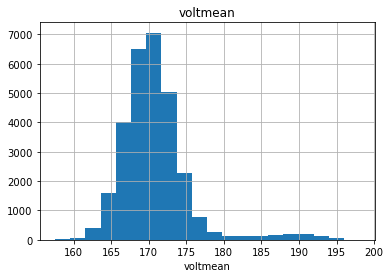

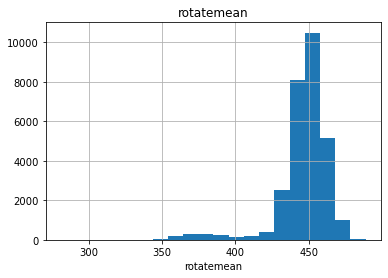

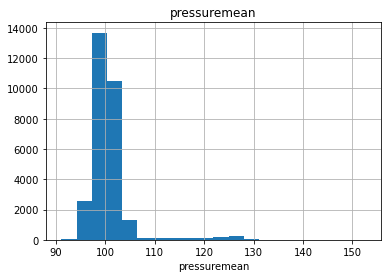

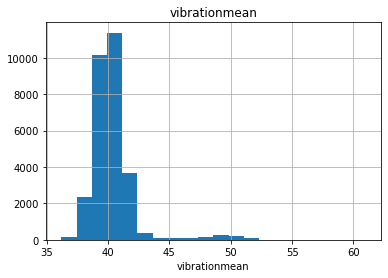

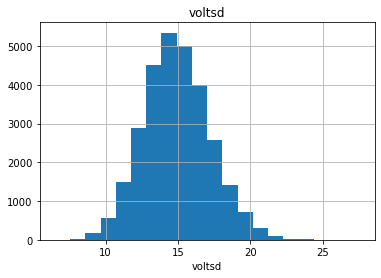

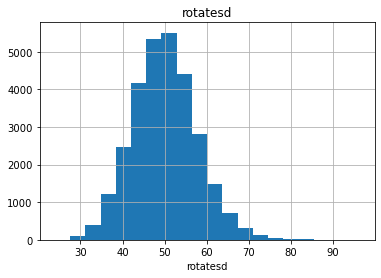

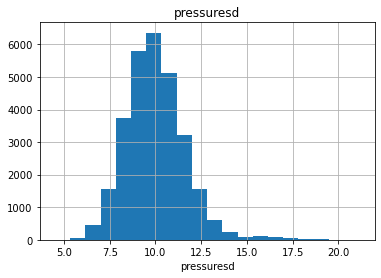

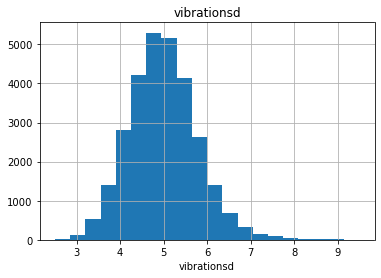

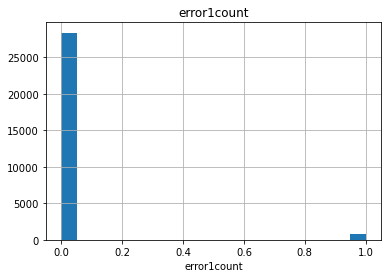

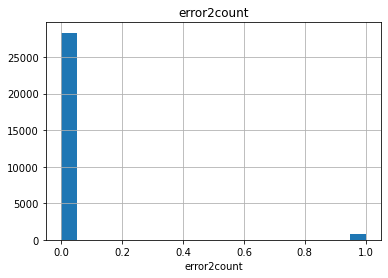

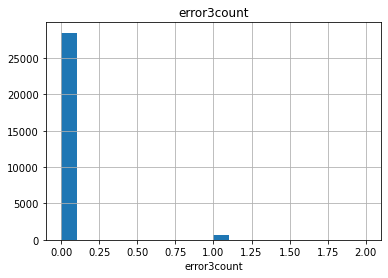

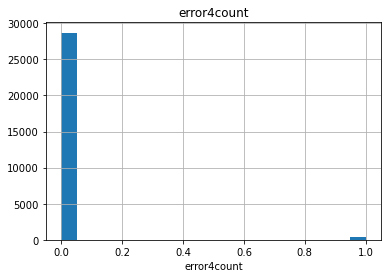

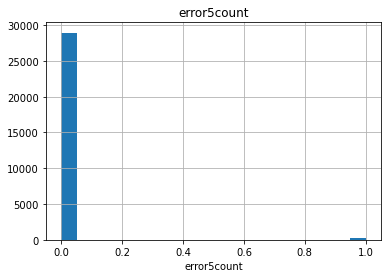

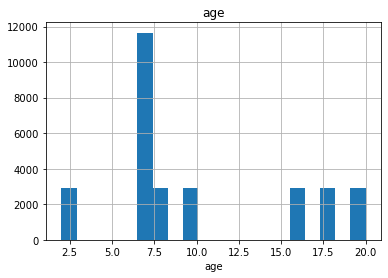

14 variables have been plotted


In [23]:
# Sayısal değişkenlerin hepsini otomatik olarak nasıl analiz ederiz?
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

In [24]:
# Bu değişkenlerin dağılımları çok da normal değil gibi.
# Eğer doğrusal bir model kullanacak olsaydık bu durumda bu değişkenlere logaritmik bir dönüşüm uygulamak gerekirdi.

In [25]:
# 4. TARGET/DEPENDENT/OUTPUT/ ANALIZI

In [26]:
#df = pd.read_csv("grad/cnc.csv")

In [27]:
# Survived değişkeninin dağılımını inceleyelim
df["failure"].value_counts()

0    28682
1      448
Name: failure, dtype: int64

In [28]:
cat_cols

['model']

In [29]:
# KATEGORIK DEGISKENLERE GORE TARGET ANALIZI
# Nasıl yani? Kategorik değişkenlere göre grup by yapıp failure'a göre ortalamasını alarak.
df.groupby("model")["failure"].mean()

model
model3    0.015105
model4    0.016478
Name: failure, dtype: float64

In [30]:
# Peki bunu tüm değişkenlere otomatik olarak nasıl yapabiliriz?
def target_summary_with_cat(data, target):
    cats_names = [col for col in data.columns if df[col].dtypes == 'O' and len(data[col].unique()) < 3 and col not in target]
    for var in cats_names:
        print(pd.DataFrame({"TARGET_MEAN": data.groupby(var)[target].mean()}), end="\n\n\n")


target_summary_with_cat(df, "failure")

        TARGET_MEAN
model              
model3     0.015105
model4     0.016478




In [31]:
# SAYISAL DEGISKENLERE GORE TARGET ANALIZI

In [32]:
def target_summary_with_nums(data, target):
    num_names = [col for col in data.columns if len(data[col].unique()) > 5
                 and df[col].dtypes != 'O'
                 and col not in target
                 and col not in "machineID"]

    for var in num_names:
        print(df.groupby(target).agg({var: np.mean}), end="\n\n\n")


target_summary_with_nums(df, "failure")

           voltmean
failure            
0        170.658303
1        176.552400


         rotatemean
failure            
0        447.220088
1        404.295477


         pressuremean
failure              
0          100.677927
1          100.001008


         vibrationmean
failure               
0            40.356018
1            41.758954


            voltsd
failure           
0        14.934067
1        14.280473


          rotatesd
failure           
0        49.992587
1        50.835143


         pressuresd
failure            
0          9.984427
1          9.887358


         vibrationsd
failure             
0           4.995394
1           5.055380


               age
failure           
0        10.187504
1        11.000000




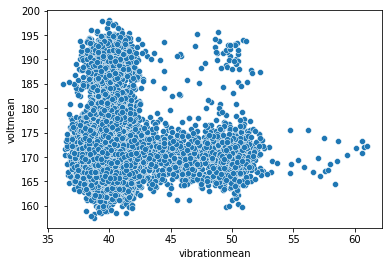

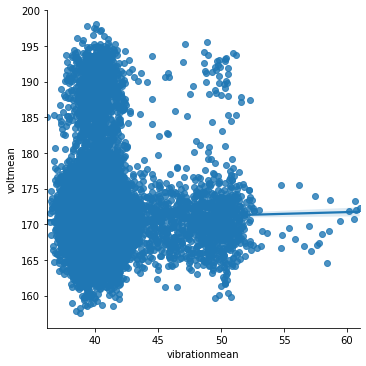

,machineID,voltmean,rotatemean,pressuremean,vibrationmean,voltsd,rotatesd,pressuresd,vibrationsd,error1count,error2count,error3count,error4count,error5count,age,failure
machineID,1.000000,-0.006200,-0.003292,0.000080,-0.026313,0.005461,0.031895,0.001941,-0.008465,0.011192,0.015796,0.027907,0.007910,-0.005908,0.037912,0.010101
voltmean,-0.006200,1.000000,0.016943,-0.003250,0.020669,0.079314,0.006626,0.011827,0.004435,0.100280,0.006278,-0.019636,-0.008668,0.010648,0.012933,0.156652
rotatemean,-0.003292,0.016943,1.000000,0.003213,0.032147,0.003352,-0.141788,0.013011,-0.002206,-0.020425,-0.203594,-0.221476,0.027624,-0.041815,-0.007175,-0.283864
pressuremean,0.000080,-0.003250,0.003213,1.000000,0.004144,0.001251,0.000888,0.181202,0.014005,-0.014601,0.006392,-0.016669,-0.019363,-0.008644,-0.003144,-0.019228
vibrationmean,-0.026313,0.020669,0.032147,0.004144,1.000000,0.003485,-0.021774,-0.011697,0.153316,-0.016907,-0.007507,-0.009683,-0.036617,0.160164,0.037454,0.087616
voltsd,0.005461,0.079314,0.003352,0.001251,0.003485,1.000000,0.005072,0.004685,0.014831,-0.005240,-0.009723,-0.024716,0.014269,0.019048,0.018242,-0.035136
rotatesd,0.031895,0.006626,-0.141788,0.000888,-0.021774,0.005072,1.000000,0.003999,-0.015365,-0.017630,0.004368,-0.000314,0.006790,0.012821,0.031333,0.013524
pressuresd,0.001941,0.011827,0.013011,0.181202,-0.011697,0.004685,0.003999,1.000000,0.019422,-0.002517,-0.002928,-0.005930,-0.010476,-0.006147,0.015843,-0.007294
vibrationsd,-0.008465,0.004435,-0.002206,0.014005,0.153316,0.014831,-0.015365,0.019422,1.000000,0.008564,-0.002400,-0.002679,0.009898,0.025928,0.018881,0.009314
error1count,0.011192,0.100280,-0.020425,-0.014601,-0.016907,-0.005240,-0.017630,-0.002517,0.008564,1.000000,-0.017289,0.003012,0.009783,-0.008169,-0.017777,0.215422


In [33]:
# 5.SAYISAL DEGISKENLERIN BIRBIRLERINE GORE INCELENMESI

sns.scatterplot(x="vibrationmean", y="voltmean", data=df)
plt.show()

sns.lmplot(x="vibrationmean", y="voltmean", data=df)
plt.show()


df.corr()